In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('height-weight.csv')
df.head()


,Weight,Height
0,70,175
1,65,168
2,80,180
3,55,160
4,90,185


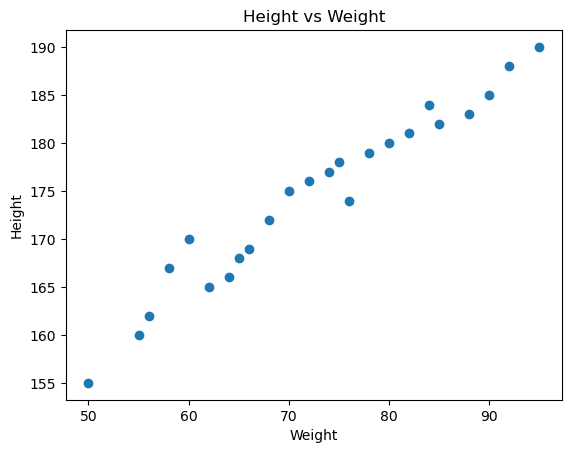

In [3]:
## Scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height vs Weight')
plt.show()

In [4]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.975637
Height,0.975637,1.000000


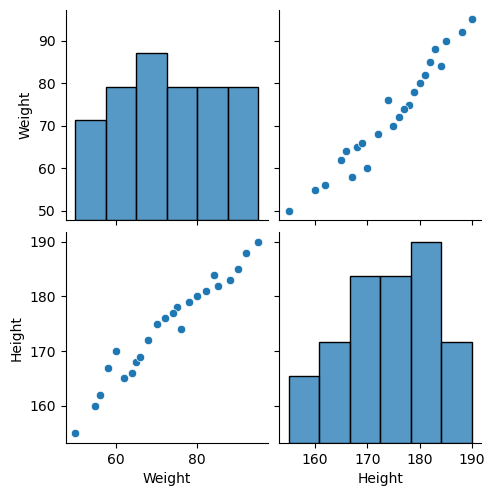

In [5]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)
plt.show()

In [6]:
## Independent and dependent features
X = df[['Weight']] # Independent feature should be dataframe or 2D array

y = df['Height'] # Dependent feature should be series or 1D array


In [7]:
## Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (6, 1), (18,), (6,))

In [9]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train, X_test

(array([[-0.86546272],
        [-0.61419935],
        [ 0.97713533],
        [-1.03297163],
        [ 0.6421175 ],
        [ 0.47460859],
        [-1.20048055],
        [-1.45174392],
        [ 1.47966207],
        [-1.36798946],
        [-0.53044489],
        [ 0.30709968],
        [ 1.64717098],
        [ 1.06088979],
        [-0.36293598],
        [ 1.31215316],
        [-0.69795381],
        [ 0.22334522]]),
 array([[-1.8705162 ],
        [ 0.80962642],
        [-0.19542707],
        [ 0.13959076],
        [-0.02791815],
        [ 1.89843436]]))

In [11]:
## Applying Linear Regression

from sklearn.linear_model import LinearRegression

In [12]:
regression = LinearRegression()

In [13]:
regression.fit(X_train, y_train)

LinearRegression()

In [14]:
print("Coefficient or slope of the line is: ", regression.coef_)
print("Intercept of the line is: ", regression.intercept_)


Coefficient or slope of the line is:  [8.12418231]
Intercept of the line is:  174.0


(18, 1) (18,)


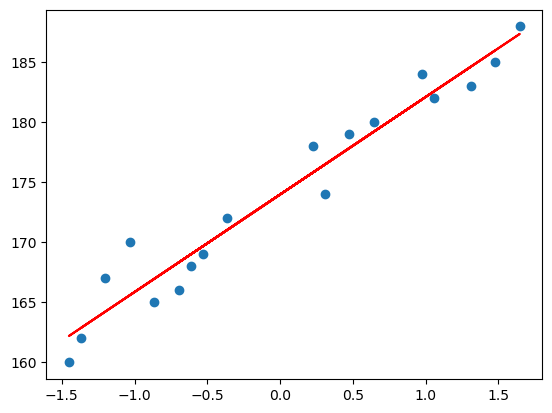

In [15]:
## Plot Training data best fit line
print(X_train.shape, y_train.shape)
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color = 'red')
plt.show()

Prediction of test data
1. Predicted Height Output = intercept + coef_(Weights)
2. y_pred_test = regression.intercept_ + regression.coef_ * X_test

In [16]:
## Prediction for test data
y_pred = regression.predict(X_test)

In [17]:
## Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)

Mean Squared Error:  5.019154391611449
Mean Absolute Error:  1.9138737334372518
Root Mean Squared Error:  2.2403469355462446


R Square
Formula : 
- R^2 = 1 -  (SSR / SST)
- SSR = Sum of Squared Residuals
- SST = Sum of Squared Total
- R^2 = coefficient of determination 

In [19]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("R2 Score: ", score)

R2 Score:  0.954600613543213


**Adjusted_R2 = 1 -[(1 - R2)*(n-1)/(n-k-1)]**

 where
- n = number of samples
- k = number of independent features
- R2 = r2_score

In [20]:
# Display adjusted R-squared value
1 - (1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)

0.9525370050679045

In [21]:
## OLS Linear Regression
import statsmodels.api as sm

In [22]:
model = sm.OLS(y_train, X_train).fit()

In [23]:
prediction = model.predict(X_test)
print(prediction)

[-15.19641465   6.57755261  -1.58768511   1.1340608   -0.22681216
  15.42322681]


In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):             -0.057
Method:                 Least Squares   F-statistic:                            0.03706
Date:                Fri, 26 Sep 2025   Prob (F-statistic):                       0.850
Time:                        06:53:06   Log-Likelihood:                         -118.40
No. Observations:                  18   AIC:                                      238.8
Df Residuals:                      17   BIC:                                      239.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             8.1242     42.204      0.192      0.850     -80.918      97.166
==============================================================================
Omnibus:                        1.511   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                1.244
Skew:                           0.581   Prob(JB):                        0.537
Kurtosis:                       2.446   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
## Prediction for new data
regression.predict(scaler.transform([[60]]))

array([165.60795012])